In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

###### Finite Differences
We can compute derivatives symbolically in Python using a package called Sympy. 

Using the forward and backward difference methods.

In [17]:
from sympy import *
x,y = symbols('x,y')

init_printing(use_unicode=True)

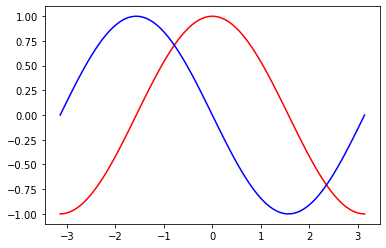

In [28]:
cos_x = cos(x)

# calculate the n-th discrete difference along the given axis.
s = diff(cos_x, x)

# substitute x with 0.5
s.subs(x, 0.5)

radius = np.pi

# from -3.14 to 3.14
# 100 values
radius_1 = np.linspace(-radius, radius, num=100)
# 20 values
radius_2 = np.linspace(-radius, radius, num=20)

radius_size_1 = len(radius_1)
radius_size_2 = len(radius_2)

dimen_1 = np.zeros(radius_size_1)
dimen_2 = np.zeros(radius_size_2)

for i in range(radius_size_1):
    radius_val = radius_1[i]
    dimen_1[i] = s.subs(x, radius_val)
    
for i in range(radius_size_2):
    radius_val = radius_2[i]
    dimen_2[i] = s.subs(x, radius_val)
    
x_val = radius_1
y_val = np.cos(radius_1)
pl.plot(x_val, y_val, 'r')

x_val = radius_1
y_val = dimen_1
pl.plot(x_val, y_val, 'b')

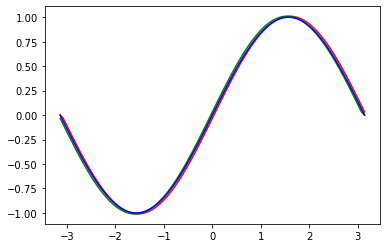

In [34]:
function_1 = np.cos(radius_1)
spacing_1 = 2*radius/100

# roll array elements along a given axis.
elements_rolled = np.roll(function_1, 1)
distance_forward_1 = (elements_rolled - function_1)/spacing_1
elements_rolled = np.roll(function_1, -1)
distance_backward_1 = (function_1 - elements_rolled)/spacing_1

pl.plot(radius_1, distance_forward_1, 'r')
pl.plot(radius_1, distance_backward_1, 'g')
pl.plot(radius_1, -dimen_1, 'b')

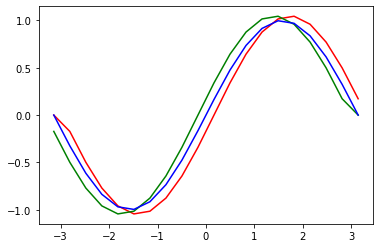

In [35]:
function_2 = np.cos(radius_2)
spacing_2 = 2*radius/20

elements_rolled = np.roll(function_2, 1)
distance_forward_2 = (elements_rolled - function_2)/spacing_2
elements_rolled = np.roll(function_2, -1)
distance_backward_2 = (function_2 - elements_rolled)/spacing_2

pl.plot(radius_2, distance_forward_2, 'r')
pl.plot(radius_2, distance_backward_2, 'g')
pl.plot(radius_2, -dimen_2, 'b')

###### Adam Algorithm

In [36]:
# Parameters
alpha = 0.01
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8

$x^2 - 2x + 3$

2x - 2

In [37]:
function = lambda x: x**2 - 2*x + 3
distance_function = lambda x: 2*x - 2

In [41]:
# Initialization
theta = 0
theta_old = 1
m = v = count = 0

# Loop until convergence (su hoi tu)
while np.abs(theta - theta_old) > epsilon:
    count += 1
    
    # compute the derivative at current point
    g = distance_function(theta)
    
    # compute the moving average of the terms
    m = beta_1*m + (1-beta_1)*g
    v = beta_2*v + (1-beta_2)*(g**2)
    
    # compute the bias-corrected gradient estimates
    m_hat = m / (1 - (beta_1**count))
    v_hat = v / (1 - (beta_2**count))
    
    # store previous estimate
    theta_old = theta
    
    # compute next estimate
    theta -= (alpha*m_hat) / (np.sqrt(v_hat)+epsilon)
    
print(theta)

1.0000020311431854


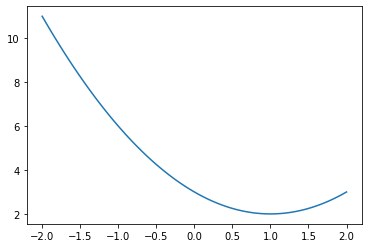

In [42]:
x = np.linspace(-2, 2, num=100)
y = function(x)
pl.plot(x, y)

###### Hyper-parameter Optimization

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

average = [True, False]
l1_ratio = stats.uniform(0,1)
log_uniform = stats.loguniform(1e-4, 1e0)
param_dist = {'average': average, 'l1_ratio':l1_ratio, 'alpha':log_uniform}

random_search = RandomizedSearchCV(classifier, param_distributions = param_dist)

average = [True, False]
l1_ratio = np.linspace(0, 1, num=10)

bases = 10
exponents = np.arange(-4, 1, dtype=float)
alpha = np.power(bases, exponents)

param_grid = {'average': average, 'l1_ratio':l1_ratio, 'alpha':alpha}

grid_search = GridSearchCV(classfier, param_grid=param_grid)

[-4. -3. -2. -1.  0.]


###### K-Means Optimization

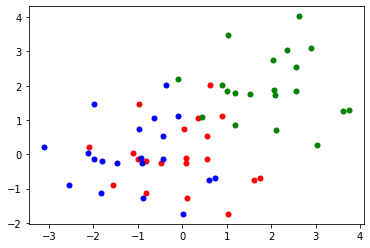

In [47]:
# make some random data
data_1 = np.random.randn(20,2)
data_2 = data_1 + np.array([2,2])
data_3 = data_1 + np.array([-1,0])

x = data_1[:,0]
y = data_1[:,1]
marker_size = 10

pl.plot(x, y, 'r.', markersize=marker_size)

x = data_2[:,0]
y = data_2[:,1]

pl.plot(x, y, 'g.', markersize=marker_size)

x = data_3[:,0]
y = data_3[:,1]

pl.plot(x, y, 'b.', markersize=marker_size)

In [50]:
data = np.vstack((data_1, data_2, data_3))

# initialize things
k = 3
means = np.random.randn(k,2)

rows = k
cols = np.shape(data)[0]
distances = np.zeros((rows, cols))

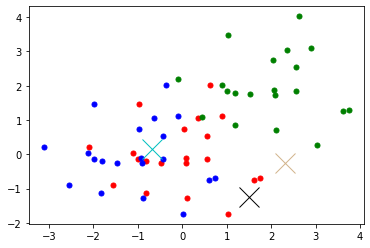

In [58]:
marker_size = 10

x_val = data_1[:,0]
y_val = data_1[:,1]

pl.plot(x_val, y_val, 'r.', markersize=marker_size)

x_val = data_2[:,0]
y_val = data_2[:,1]
pl.plot(x_val, y_val, 'g.', markersize=marker_size)

x_val = data_3[:,0]
y_val = data_3[:,1]
pl.plot(x_val, y_val, 'b.', markersize=marker_size)

x_val = means[0,0]
y_val = means[0,1]
marker_size = 20
pl.plot(x_val, y_val, 'kx', markersize=marker_size)

x_val = means[1,0]
y_val = means[1,1]
pl.plot(x_val, y_val, color='tan', marker='x', markersize=marker_size)

x_val = means[2,0]
y_val = means[2,1]
pl.plot(x_val, y_val, 'cx', markersize=marker_size)

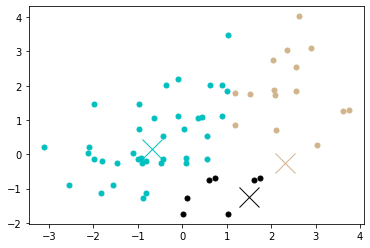

In [70]:
x_axis = 0
y_axis = 1
for j in range(k):
    sum_val = (data - means[j,:])**2
    distances[j,:] = np.sum(sum_val, axis=y_axis)
    
# identify the closest cluster
cluster = distances.argmin(axis=x_axis)

pl.figure()
x_val = means[0,0]
y_val = means[0,1]
marker_size = 20
pl.plot(x_val, y_val, 'kx', markersize=marker_size)

x_val = means[1,0]
y_val = means[1,1]
pl.plot(x_val, y_val, color='tan', marker='x', markersize=marker_size)

x_val = means[2,0]
y_val = means[2,1]
pl.plot(x_val, y_val, 'cx', markersize=marker_size)

marker_size = 10
this_cluster = np.where(cluster==0)
x_val = data[this_cluster, 0]
y_val = data[this_cluster, 1]
pl.plot(x_val, y_val, 'k.', markersize=marker_size)

this_cluster = np.where(cluster==1)
x_val = data[this_cluster, 0]
y_val = data[this_cluster, 1]
pl.plot(x_val, y_val, color='tan', marker='.', markersize=marker_size)

this_cluster = np.where(cluster==2)
x_val = data[this_cluster, 0]
y_val = data[this_cluster, 1]
pl.plot(x_val, y_val, 'c.', markersize=marker_size)

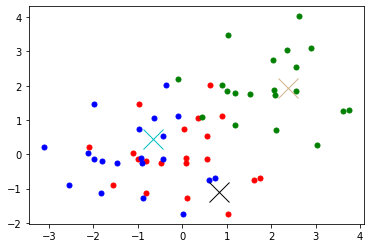

In [76]:
# update the cluster centres
for j in range(k):
    this_cluster = np.where(cluster==j)
    sum_val = data[this_cluster,:]
    means[j,:] = np.sum(sum_val, axis=y_axis)
    means[j,:] /= np.shape(this_cluster)[1]
    
x_val = data_1[:,0]
y_val = data_1[:,1]
marker_size = 10
pl.plot(x_val, y_val, 'r.', markersize=marker_size)

x_val = data_2[:,0]
y_val = data_2[:,1]
pl.plot(x_val, y_val, 'g.', markersize=marker_size)

x_val = data_3[:,0]
y_val = data_3[:,1]
pl.plot(x_val, y_val, 'b.', markersize=marker_size)

x_val = means[0,0]
y_val = means[0,1]
marker_size = 20
pl.plot(x_val, y_val, 'kx', markersize=marker_size)

x_val = means[1,0]
y_val = means[1,1]
pl.plot(x_val, y_val, color='tan', marker='x', markersize=marker_size)

x_val = means[2,0]
y_val = means[2,1]
pl.plot(x_val, y_val, 'cx', markersize=marker_size)